In [1]:
# import basics 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter

In [2]:
import pickle
import glob
import json
from tqdm.notebook import tqdm

In [3]:
import random
import seaborn as sns
import colorcet as cc

In [4]:
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

In [5]:
from sklearn.decomposition import PCA

In [6]:
import numpy.typing as nptyping
from typing import List, Dict

In [7]:
# Set up LaTeX fonts
#plt.style.use(['no-latex'])
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['text.usetex'] = True
#plt.rcParams['text.latex.unicode'] = True
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']

In [8]:
# read embedding dict from disk
embedding_file = "../data/doc2embedding.pkl"

with open(embedding_file, "rb") as file:
    doc2embedding: Dict[str, Dict] = pickle.load(file)

In [9]:
# read embedding dict from disk
embedding_file = "../data/doc2embedding_2.pkl"

with open(embedding_file, "rb") as file:
    doc2embedding_2: Dict[str, Dict] = pickle.load(file)

In [10]:
# read embedding dict from disk
embedding_file = "../data/doc2embedding_topics.pkl"

with open(embedding_file, "rb") as file:
    doc2embedding_topics: Dict[str, Dict] = pickle.load(file)

In [11]:
# read embedding dict from disk
embedding_file = "../data/doc2embedding_only_topics.pkl"

with open(embedding_file, "rb") as file:
    doc2embedding_only_topics: Dict[str, Dict] = pickle.load(file)

In [12]:
documents: List = list(doc2embedding.keys())
embeddings: nptyping.ArrayLike = np.array(list(doc2embedding.values()))

In [13]:
embeddings_2: nptyping.ArrayLike = np.array(list(doc2embedding_2.values()))

In [14]:
embeddings_with_topics: nptyping.ArrayLike = np.array(
    list(doc2embedding_topics.values())
)

In [15]:
embeddings_only_topics: nptyping.ArrayLike = np.array(
    list(doc2embedding_only_topics.values())
)

In [16]:
embeddings.shape

(17486, 384)

In [17]:
# read dictionary for classifier results 
embedding_file = "../data/doc2results_1660_1920.pkl"

with open(embedding_file, "rb") as file:
    categories_by_classifier_dict: Dict[str, Dict] = pickle.load(file)

In [19]:
# to get categories, read JSON files
json_files: List = [
    json_file_id.split('/')[-1][:-5]
    for json_file_id in glob.glob('../data/json_files/*.json')
]

doc2json: Dict[str, Dict] = {}

for doc in tqdm(json_files):
    # open the file in read mode
    file_path = "../data/json_files/" + doc + ".json"
    with open(file_path, "r", encoding='utf-8',) as file:
        # Load the JSON data
        doc2json[doc] = json.load(file)

  0%|          | 0/17486 [00:00<?, ?it/s]

In [20]:
categories: List = [
    doc2json[doc]['scientific_discipline'] for doc in documents
]

In [34]:
zeroshot_classifier_categories: List = [
    categories_by_classifier_dict[doc][1][0] 
    for doc in documents
]

zeroshot_classifier_categories_2: List = [
    categories_by_classifier_dict[doc][1][1] 
    for doc in documents
]

In [22]:
agreements = 0

num_total = len(doc2embedding)
for i in range(num_total):
    if zeroshot_classifier_categories[i] == categories[i]:
        agreements += 1

agreements / num_total


0.6586411986732243

In [35]:
agreements = 0

num_total = len(doc2embedding)
for i in range(num_total):
    if zeroshot_classifier_categories_2[i] == categories[i]:
        agreements += 1

agreements / num_total


0.18506233558275192

In [23]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42, verbose=1)

tsne_embeddings: nptyping.ArrayLike = tsne.fit_transform(embeddings)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 17486 samples in 0.003s...
[t-SNE] Computed neighbors for 17486 samples in 1.991s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17486
[t-SNE] Computed conditional probabilities for sample 2000 / 17486
[t-SNE] Computed conditional probabilities for sample 3000 / 17486
[t-SNE] Computed conditional probabilities for sample 4000 / 17486
[t-SNE] Computed conditional probabilities for sample 5000 / 17486
[t-SNE] Computed conditional probabilities for sample 6000 / 17486
[t-SNE] Computed conditional probabilities for sample 7000 / 17486
[t-SNE] Computed conditional probabilities for sample 8000 / 17486
[t-SNE] Computed conditional probabilities for sample 9000 / 17486
[t-SNE] Computed conditional probabilities for sample 10000 / 17486
[t-SNE] Computed conditional probabilities for sample 11000 / 17486
[t-SNE] Computed conditional probabilities for sample 12000 / 17486
[t-SNE] Computed conditional probabilities for sam

In [24]:
tsne_embeddings_2: nptyping.ArrayLike = tsne.fit_transform(embeddings_2)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 17486 samples in 0.010s...
[t-SNE] Computed neighbors for 17486 samples in 8.429s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17486
[t-SNE] Computed conditional probabilities for sample 2000 / 17486
[t-SNE] Computed conditional probabilities for sample 3000 / 17486
[t-SNE] Computed conditional probabilities for sample 4000 / 17486
[t-SNE] Computed conditional probabilities for sample 5000 / 17486
[t-SNE] Computed conditional probabilities for sample 6000 / 17486
[t-SNE] Computed conditional probabilities for sample 7000 / 17486
[t-SNE] Computed conditional probabilities for sample 8000 / 17486
[t-SNE] Computed conditional probabilities for sample 9000 / 17486
[t-SNE] Computed conditional probabilities for sample 10000 / 17486
[t-SNE] Computed conditional probabilities for sample 11000 / 17486
[t-SNE] Computed conditional probabilities for sample 12000 / 17486
[t-SNE] Computed conditional probabilities for sam

In [25]:
tsne_embeddings_topics: nptyping.ArrayLike = tsne.fit_transform(
    embeddings_with_topics
)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 17486 samples in 0.003s...
[t-SNE] Computed neighbors for 17486 samples in 4.871s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17486
[t-SNE] Computed conditional probabilities for sample 2000 / 17486
[t-SNE] Computed conditional probabilities for sample 3000 / 17486
[t-SNE] Computed conditional probabilities for sample 4000 / 17486
[t-SNE] Computed conditional probabilities for sample 5000 / 17486
[t-SNE] Computed conditional probabilities for sample 6000 / 17486
[t-SNE] Computed conditional probabilities for sample 7000 / 17486
[t-SNE] Computed conditional probabilities for sample 8000 / 17486
[t-SNE] Computed conditional probabilities for sample 9000 / 17486
[t-SNE] Computed conditional probabilities for sample 10000 / 17486
[t-SNE] Computed conditional probabilities for sample 11000 / 17486
[t-SNE] Computed conditional probabilities for sample 12000 / 17486
[t-SNE] Computed conditional probabilities for sam

In [26]:
tsne_embeddings_only_topics: nptyping.ArrayLike = tsne.fit_transform(
    embeddings_only_topics
)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 17486 samples in 0.003s...


[t-SNE] Computed neighbors for 17486 samples in 4.535s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17486
[t-SNE] Computed conditional probabilities for sample 2000 / 17486
[t-SNE] Computed conditional probabilities for sample 3000 / 17486
[t-SNE] Computed conditional probabilities for sample 4000 / 17486
[t-SNE] Computed conditional probabilities for sample 5000 / 17486
[t-SNE] Computed conditional probabilities for sample 6000 / 17486
[t-SNE] Computed conditional probabilities for sample 7000 / 17486
[t-SNE] Computed conditional probabilities for sample 8000 / 17486
[t-SNE] Computed conditional probabilities for sample 9000 / 17486
[t-SNE] Computed conditional probabilities for sample 10000 / 17486
[t-SNE] Computed conditional probabilities for sample 11000 / 17486
[t-SNE] Computed conditional probabilities for sample 12000 / 17486
[t-SNE] Computed conditional probabilities for sample 13000 / 17486
[t-SNE] Computed conditional probabilities for sample 14000 / 17486

In [27]:
category2color: Dict[str, str] = {
    'Biology & Life Sciences': '#2E7D32',  # Earthy dark green, connecting with the environment
    'Medicine & Health Sciences': 'maroon',  # Deep pink, conveying care and attention
    'Environmental & Earth Sciences': 'darkgoldenrod', #'darkbrown', # Brown, representing the earth and environment
    'Physics': 'dodgerblue', #'#1976D2',  # Medium blue, indicating clarity and precision
    'Astronomy': 'navy', #'#0D47A1',  # Deep blue, representing the vastness of space
    'Engineering & Technology': 'yellowgreen', #'gold', #'#F57C00',  # Bright orange, representing innovation and creativity
    'Mathematics & Statistics': '#6A1B9A',  # Amethyst purple, symbolizing complexity and depth
    'Social Sciences & Humanities': 'pink',  # Dark brown, suggesting tradition and study
    'Chemistry': 'gold', #'crimson', #darkslategray', #'#D32F2F',  # Vibrant red, reflecting the energy of chemical reactions
    'Other': 'gray', 
}

In [28]:
for i, cat in enumerate(categories):
    if cat == "Earth Sciences":
        categories[i] = "Environmental & Earth Sciences"

    elif cat == "Earth & Environmental Sciences":
        categories[i] = "Environmental & Earth Sciences"

    elif cat not in category2color:
        categories[i] = 'Other'

colors = [category2color[cat] for cat in categories]

In [29]:
category2text: Dict[str, str] = {
    'Astronomy': 'Astronomy', 
    'Physics': 'Physics',
    'Chemistry': 'Chemistry', 
    'Engineering & Technology': 'Engineering',
    'Biology & Life Sciences': 'Biology',
    'Social Sciences & Humanities': 'Humanities',
    'Environmental & Earth Sciences': 'Earth Sciences', 
    'Medicine & Health Sciences': 'Medicine/Health', 
    'Mathematics & Statistics': 'Mathematics',
    #'Other': ''
}

In [30]:
def get_category_centroids(embeddings_2D, category_list):
    cateogry_embeddings = defaultdict(list)

    for cat, tsne_emb in zip(category_list, embeddings_2D):
        cateogry_embeddings[cat].append(tsne_emb)

    category_centroids = {}

    for cat, embeddings in cateogry_embeddings.items():
        centroid = np.median(embeddings, axis=0)
        category_centroids[cat] = centroid

    return category_centroids

In [31]:
def plot_embedding_2D(embeddings_2D, category_list, with_captions=True):
    """
    """

    colors = [category2color[cat] for cat in category_list]
    
    # Create a scatter plot to visualize the t-SNE embeddings
    plt.figure(figsize=(15, 9))

    scatter = plt.scatter(
        embeddings_2D[:, 0], 
        embeddings_2D[:, 1], 
        alpha=0.2, 
        c=colors,
        marker='o',
        s=18
    )

    category_centroids = get_category_centroids(
        embeddings_2D, 
        category_list
    )


    handles = [
        plt.Line2D(
            [],
            [],
            marker='o',
            color=category2color[cat], 
            linestyle='', 
            markersize=8,
            label=category2text[cat]
        ) for cat in category_centroids if cat != 'Other'
    ]

    if with_captions:

        for cat, centroid in category_centroids.items():


            if cat == "Other":
                continue

            rand_int = random.randint(-5, 5)

            plt.text(
                centroid[0] - 15, 
                centroid[1] - rand_int, 
                category2text[cat], #r"${{{}}}$".format(category2text[cat]), 
                fontdict=dict(fontsize=24, fontweight='normal', color='black'), 
                bbox=dict(
                    facecolor=category2color[cat], 
                    alpha=0.5, 
                    linewidth=0, 
                    boxstyle='round,pad=0.1'
                    )
                )

    plt.legend(
        handles=handles, 
        title="", 
        fontsize=18, 
        framealpha=0,
        loc='lower center', 
        bbox_to_anchor=(0.5, -0.25), 
        ncols=3,
    )


    plt.title('t-SNE projections', fontsize=16)
    #plt.xlabel('t-SNE Dimension 1')
    #plt.ylabel('t-SNE Dimension 2')
    #plt.ylim(-100, 100)
    #plt.xlim(-110, 110)
    plt.show()    

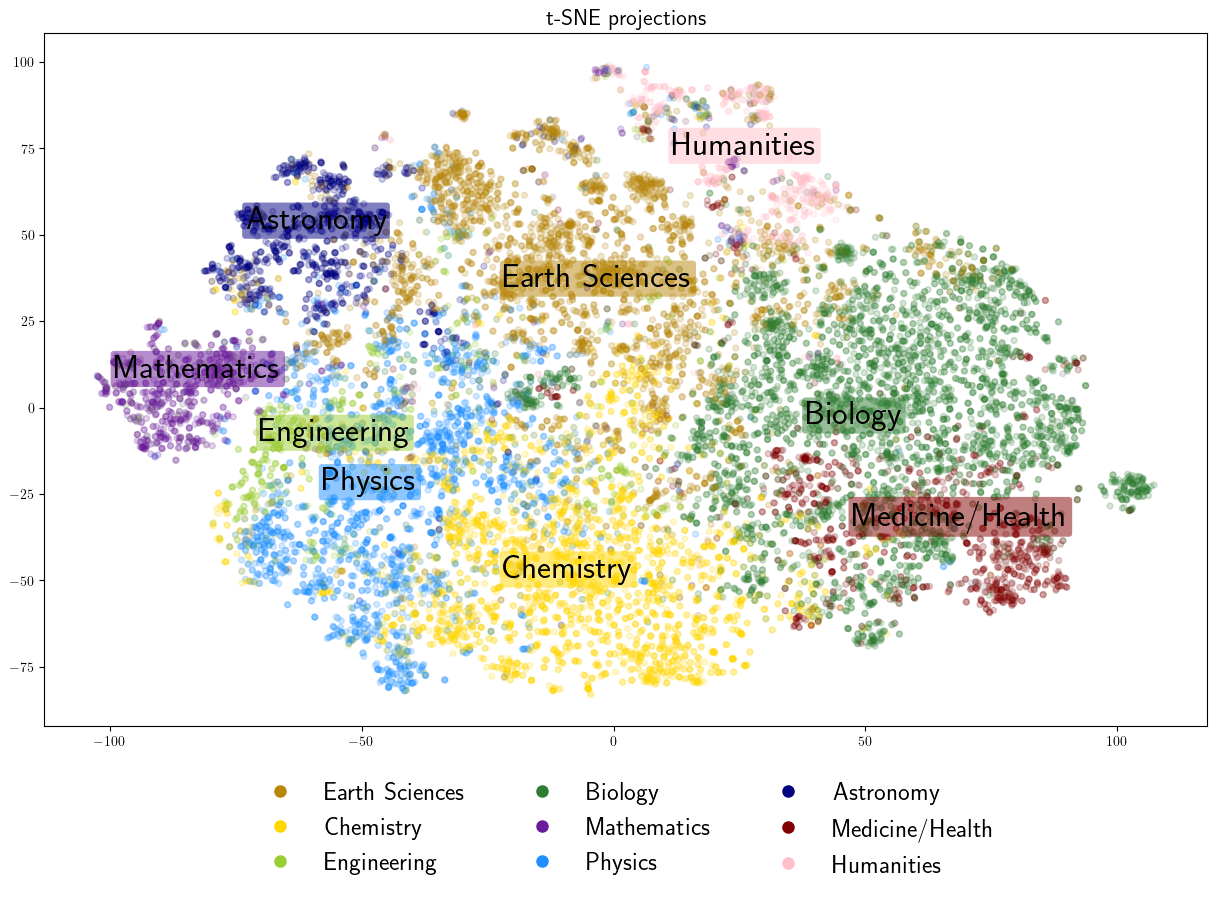

In [32]:
%matplotlib inline
plot_embedding_2D(tsne_embeddings, categories)

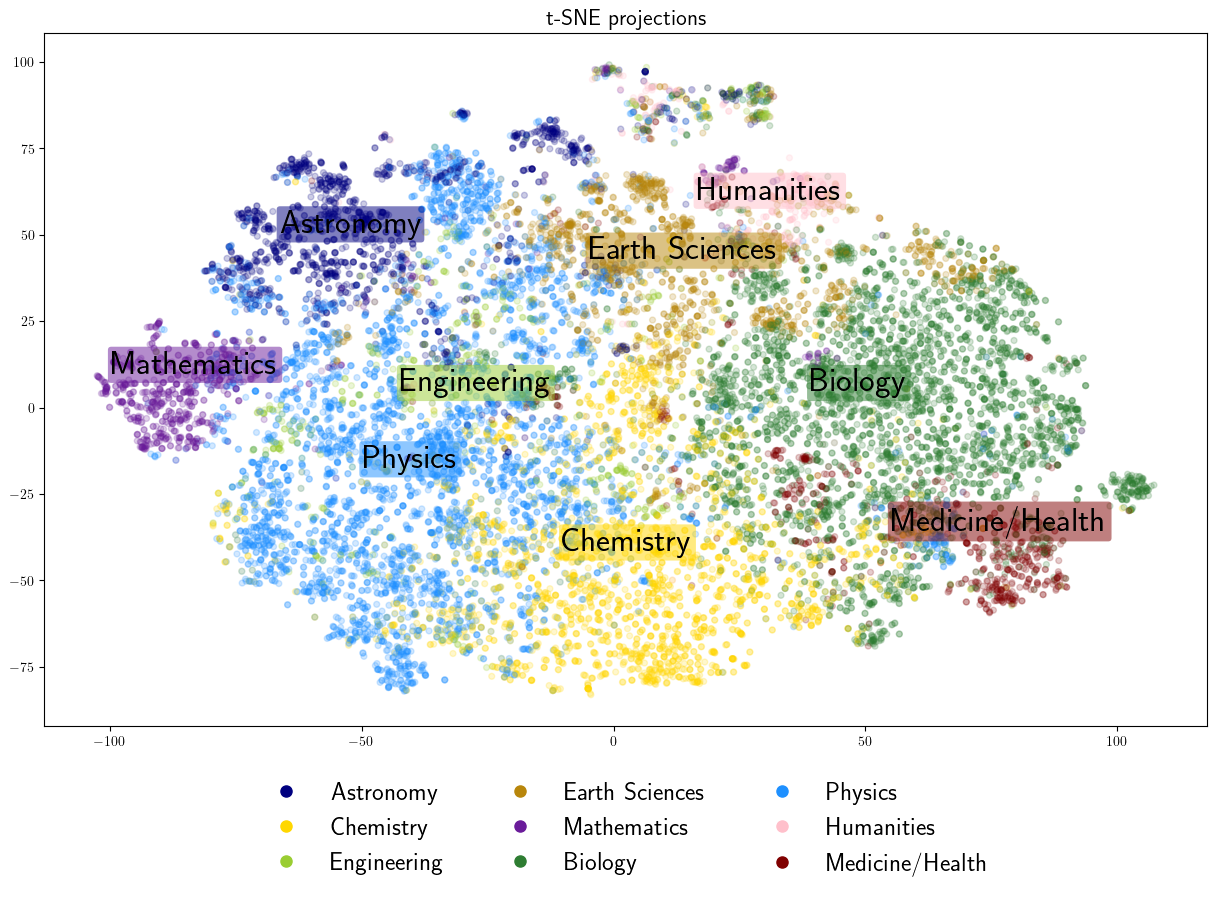

In [39]:
plot_embedding_2D(tsne_embeddings, zeroshot_classifier_categories)

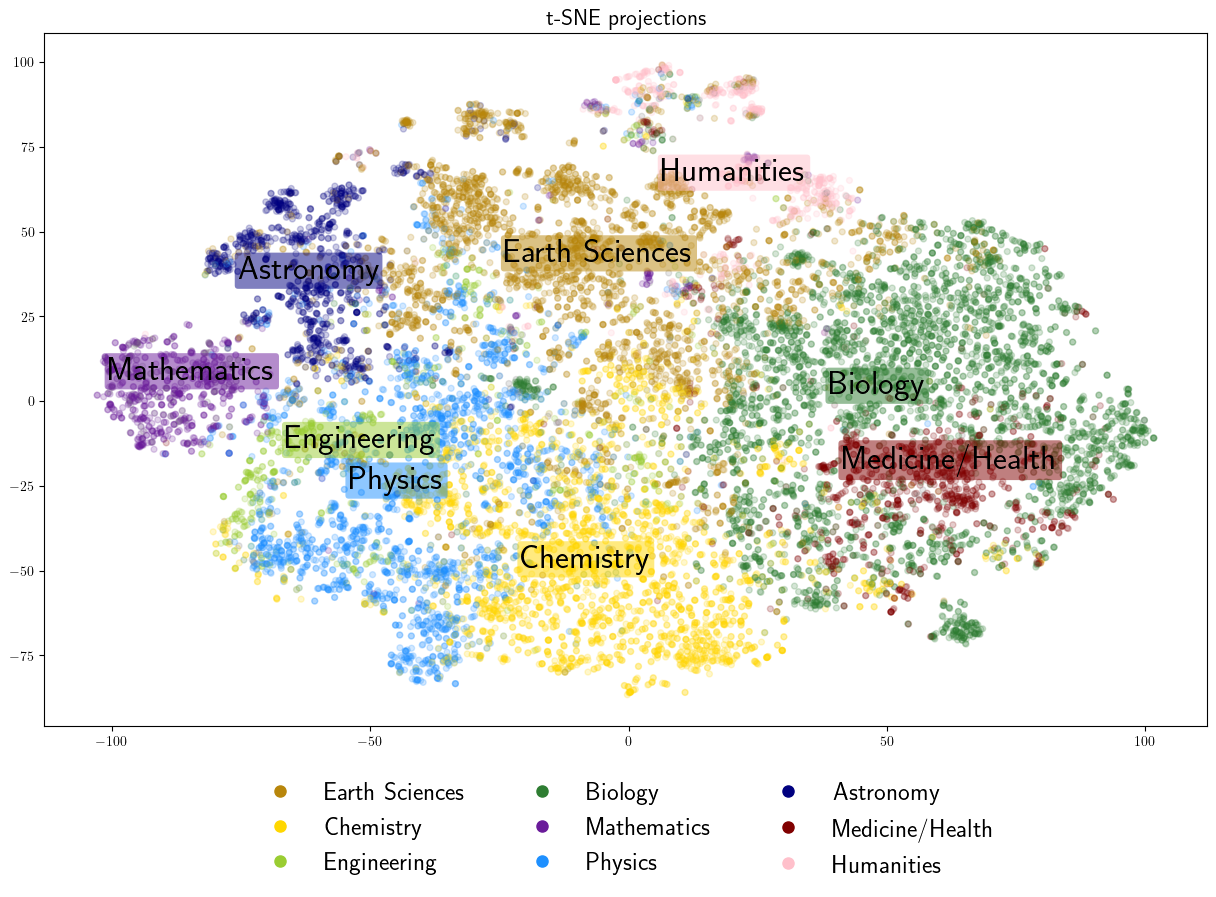

In [87]:
plot_embedding_2D(tsne_embeddings_2, categories)

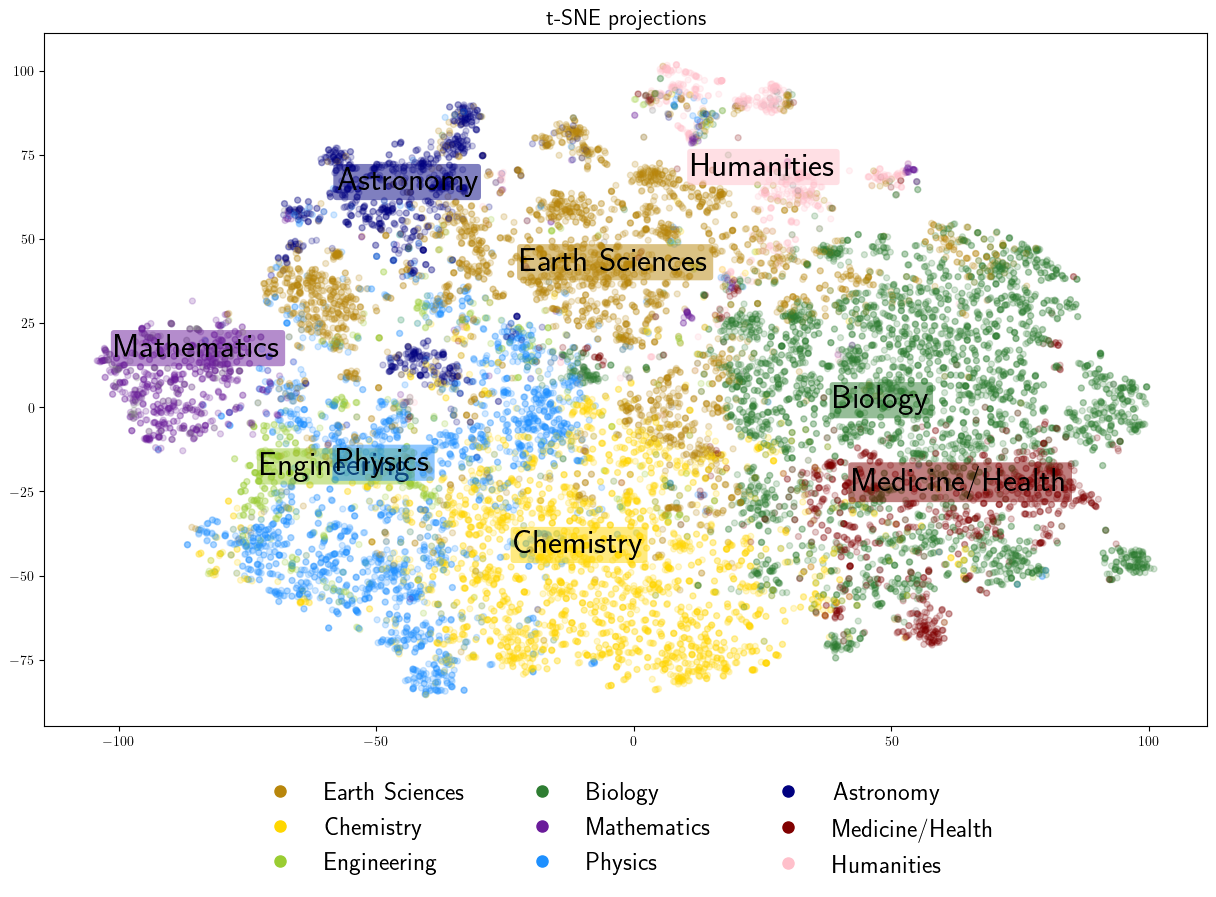

In [88]:
plot_embedding_2D(tsne_embeddings_topics, categories)

In [37]:
#plot_embedding_2D(tsne_embeddings_topics, zeroshot_classifier_categories)

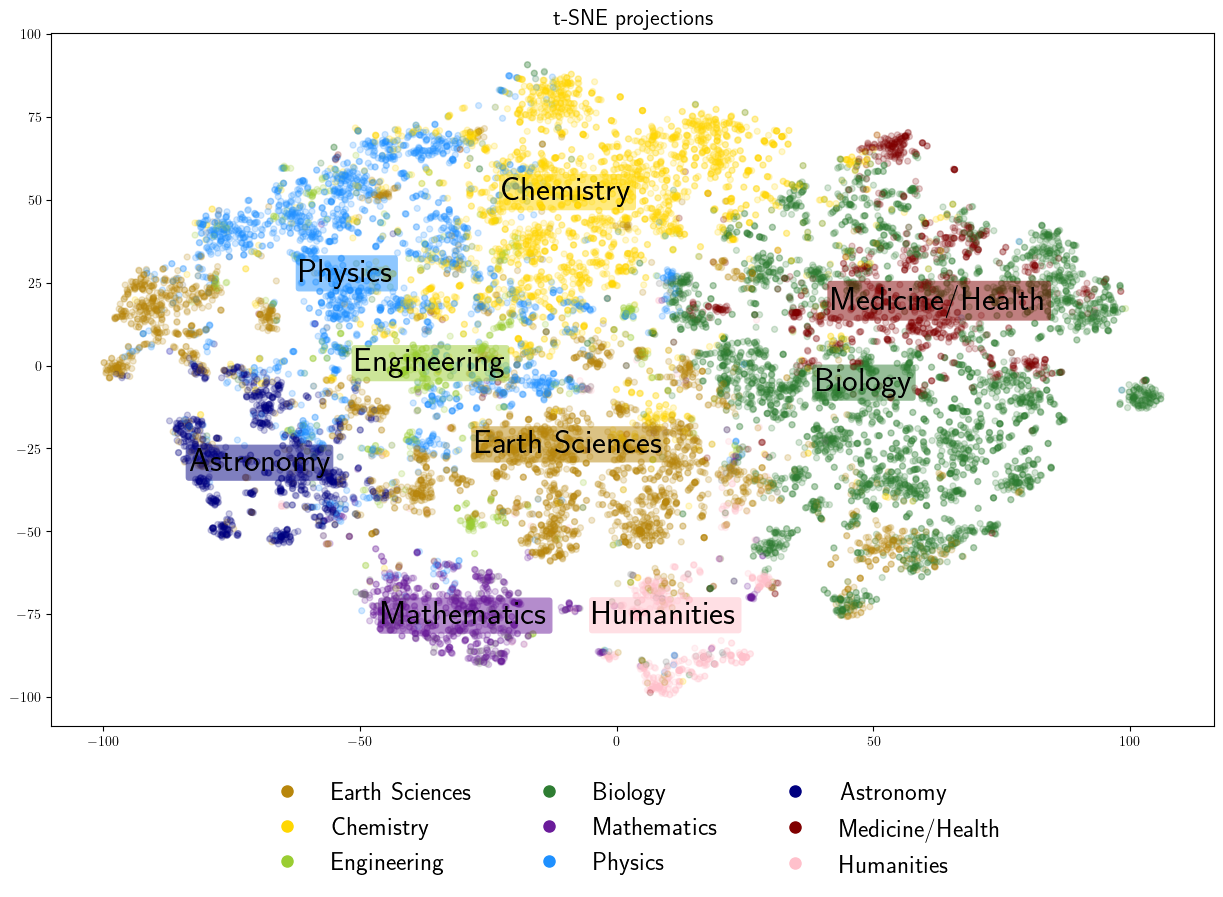

In [86]:
plot_embedding_2D(tsne_embeddings_only_topics, categories)

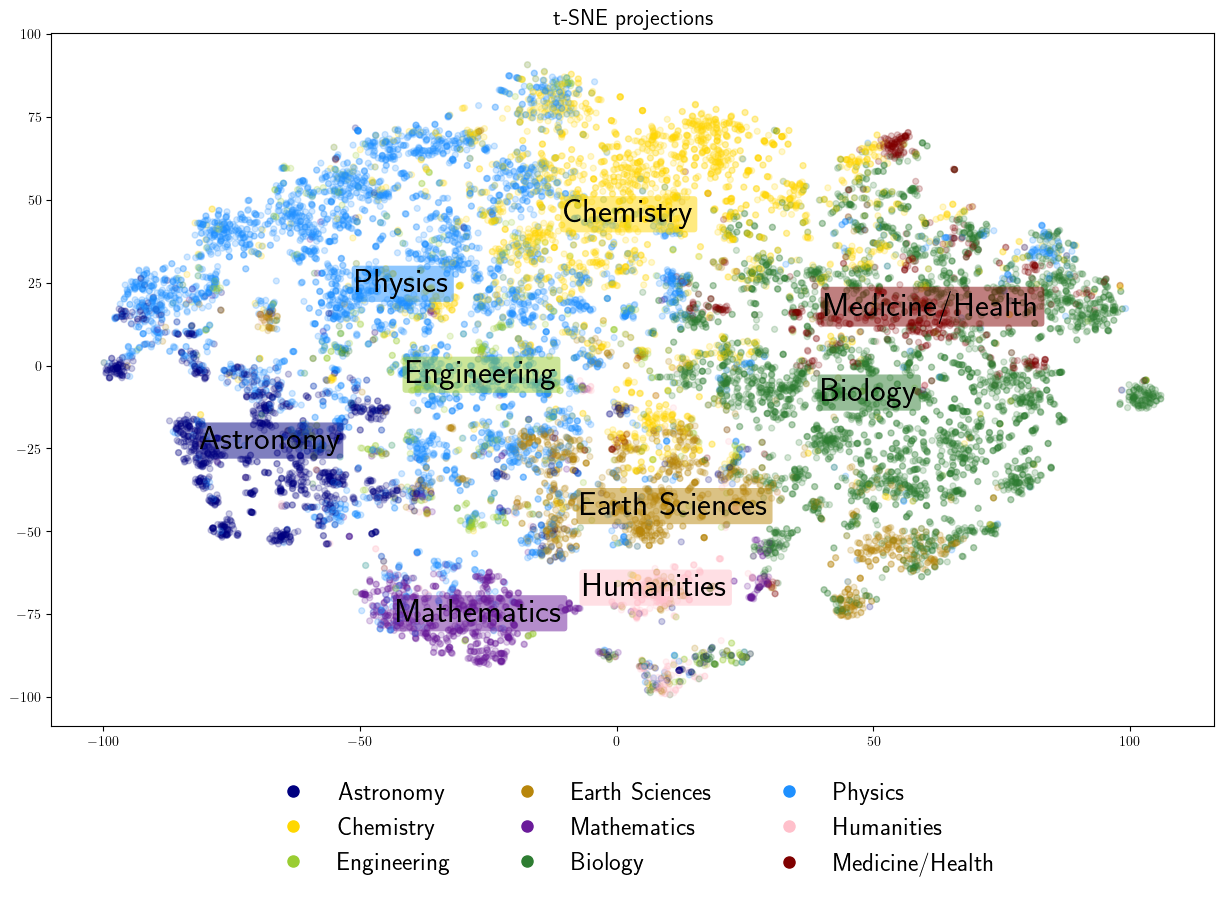

In [38]:
plot_embedding_2D(tsne_embeddings_only_topics, zeroshot_classifier_categories)